### Topic: Challenge Set 8   
### Subject: Classification Errors
### Date: 10/22/2018  
### Name: Maddy O'Brien Jones  
### Worked: alone  

**Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users.

### Challenge 1  
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [52]:
votes = pd.read_csv('house-votes-84.data')
votes = votes.replace('y',1)
votes = votes.replace('n',0)
votes = votes.replace('?', np.nan)
for each in votes.columns[:-1]:
    votes[each].fillna(votes[each].mean(),inplace=True)
votes = votes.replace('democrat.', 'democrat')
votes = votes.replace('republican.', 'republican')
votes = votes.replace('democrat', 1)
votes = votes.replace('republican', 0)
target = votes['republican.']
features = votes.loc[:,'n':'y.8']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=4444)

In [53]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)

def democrat(x):
    return np.array([1 for i in range(len(x))])

def republican(x):
    return np.array([0 for i in range(len(x))])

gb = GaussianNB()
gb.fit(X_train, y_train)

svc = SVC(probability=True)
svc.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
classifiers = [knn, lr, gb, svc, dtc, rf]

c_list = []
for each in classifiers:
    new_dict = dict()
    new_dict['model'] = each
    new_dict['accuracy'] = accuracy_score(y_test, each.predict(X_test))
    new_dict['precision'] = precision_score(y_test, each.predict(X_test))
    new_dict['recall'] = recall_score(y_test, each.predict(X_test))
    new_dict['F1'] = f1_score(y_test, each.predict(X_test))
    c_list.append(new_dict)

democrat_d = dict()
democrat_d['model'] = 'democrat'
democrat_d['accuracy'] = accuracy_score(y_test, democrat(X_test))
democrat_d['precision'] = precision_score(y_test, democrat(X_test))
democrat_d['recall'] = recall_score(y_test, democrat(X_test))
democrat_d['F1'] = f1_score(y_test, democrat(X_test))
c_list.append(democrat_d)

republican_d = dict()
republican_d['model'] = 'republican'
republican_d['accuracy'] = accuracy_score(y_test, republican(X_test))
republican_d['precision'] = precision_score(y_test, republican(X_test))
republican_d['recall'] = recall_score(y_test, republican(X_test))
republican_d['F1'] = f1_score(y_test, republican(X_test))
c_list.append(republican_d)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
votes = pd.read_csv('house-votes-84.data')
votes = votes.replace('y',1)
votes = votes.replace('n',0)
votes = votes.replace('?', np.nan)
for each in votes.columns[:-1]:
    votes[each].fillna(votes[each].mode()[0],inplace=True)
target2 = votes['n']
features2 = votes.loc[:,'y':'y.8']

X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=.3, random_state=4444)

In [56]:
knn2 = KNeighborsClassifier(n_neighbors=9)
knn2.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [57]:
knn_vote_predict = dict()
knn_vote_predict['model'] = knn2
knn_vote_predict['accuracy'] = accuracy_score(y_test2, knn2.predict(X_test2))
knn_vote_predict['precision'] = precision_score(y_test2, knn2.predict(X_test2))
knn_vote_predict['recall'] = recall_score(y_test2, knn2.predict(X_test2))
knn_vote_predict['F1'] = f1_score(y_test2, knn2.predict(X_test2))
c_list.append(knn_vote_predict)

In [58]:
scores = pd.DataFrame(c_list)
scores

,F1,accuracy,model,precision,recall
0,0.935897,0.923664,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.948052,0.924051
1,0.962500,0.954198,"LogisticRegression(C=1000, class_weight=None, ...",0.950617,0.974684
2,0.925926,0.908397,GaussianNB(priors=None),0.903614,0.949367
3,0.962025,0.954198,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.962025,0.962025
4,0.930818,0.916031,"DecisionTreeClassifier(class_weight=None, crit...",0.925000,0.936709
5,0.944099,0.931298,"(DecisionTreeClassifier(class_weight=None, cri...",0.926829,0.962025
6,0.752381,0.603053,democrat,0.603053,1.000000
7,0.000000,0.396947,republican,0.000000,0.000000
8,0.633333,0.664122,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.593750,0.678571


### Challenge 2  
For each, draw the ROC curve and calculate the AUC.

Text(0.5,0,'False Positive Rate')

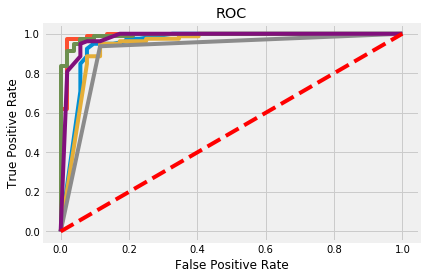

In [59]:
for each in classifiers:
    fpr, tpr, _ = roc_curve(y_test, each.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [60]:
aucs = []
for each in classifiers:
    score = roc_auc_score(y_test, each.predict(X_test))
    aucs.append((each, score))

In [61]:
aucs

[(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=12, p=2,
             weights='uniform'), 0.9235637779941578),
 (LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False), 0.9488802336903602),
 (GaussianNB(priors=None), 0.8977604673807205),
 (SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 0.9521665043816943),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
           

### Challenge 3  
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [62]:
votes = pd.read_csv('house-votes-84.data')
votes = votes.replace('y',1)
votes = votes.replace('n',0)
votes = votes.replace('?', np.nan)
for each in votes.columns[:-1]:
    votes[each].fillna(votes[each].mean(),inplace=True)
votes = votes.replace('democrat.', 'democrat')
votes = votes.replace('republican.', 'republican')
votes = votes.replace('democrat', 1)
votes = votes.replace('republican', 0)
target = votes['republican.']
features = votes.loc[:,'n':'y.8']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=4444)

In [63]:
classifiers = [knn, lr, gb, svc, dtc, rf]

scores = []
for each in classifiers:
    cv_scores = dict()
    cv_scores['model']=each
    for score in ['accuracy', 'precision','recall','f1']:
        cv_scores[score]=cross_val_score(each, features, target, scoring=score)
    scores.append(cv_scores)

knn_vote_predict = dict()
knn_vote_predict['model'] = knn2
for score in ['accuracy', 'precision','recall','f1']:
    cv_scores[score]=cross_val_score(knn2, features2, target2, scoring=score)
scores.append(knn_vote_predict)

cv_scores = pd.DataFrame(scores)
cv_scores

,accuracy,f1,model,precision,recall
0,"[0.9310344827586207, 0.9172413793103448, 0.916...","[0.9411764705882353, 0.9310344827586207, 0.930...","KNeighborsClassifier(algorithm='auto', leaf_si...","[0.9876543209876543, 0.9529411764705882, 0.963...","[0.898876404494382, 0.9101123595505618, 0.8988..."
1,"[0.9655172413793104, 0.9793103448275862, 0.9375]","[0.9720670391061451, 0.9834254143646408, 0.947...","LogisticRegression(C=1000, class_weight=None, ...","[0.9666666666666667, 0.967391304347826, 0.9761...","[0.9775280898876404, 1.0, 0.9213483146067416]"
2,"[0.9517241379310345, 0.9241379310344827, 0.916...","[0.96045197740113, 0.9398907103825136, 0.93023...",GaussianNB(priors=None),"[0.9659090909090909, 0.9148936170212766, 0.963...","[0.9550561797752809, 0.9662921348314607, 0.898..."
3,"[0.9655172413793104, 0.9586206896551724, 0.9375]","[0.9717514124293786, 0.9662921348314607, 0.947...","SVC(C=1.0, cache_size=200, class_weight=None, ...","[0.9772727272727273, 0.9662921348314607, 0.987...","[0.9662921348314607, 0.9662921348314607, 0.910..."
4,"[0.9586206896551724, 0.9655172413793104, 0.923...","[0.9775280898876404, 0.9666666666666667, 0.947...","DecisionTreeClassifier(class_weight=None, crit...","[0.9770114942528736, 0.9666666666666667, 0.976...","[0.9550561797752809, 0.9775280898876404, 0.921..."
5,"[0.7054794520547946, 0.6666666666666666, 0.645...","[0.6504065040650407, 0.6571428571428573, 0.523...","(DecisionTreeClassifier(class_weight=None, cri...","[0.6666666666666666, 0.5897435897435898, 0.622...","[0.6349206349206349, 0.7419354838709677, 0.451..."
6,NaN,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",NaN,NaN


### Challenge 4
For your movie classifiers, calculate the precision and recall for each class.

In [71]:
movies = pd.read_csv('2013_movies.csv')
movies = movies.dropna()
features = movies.loc[:,['Budget','DomesticTotalGross','Runtime']]
target = movies['Rating']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=4444)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)

def stupid(x):
    return np.array(['PG-13' for i in range(len(x))])

In [78]:
precision_score(y_test, knn.predict(X_test), average=None)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.36363636, 0.5       ])

In [81]:
knndict = dict()
knndict['Model'] = knn
knndict['Precision'] = precision_score(y_test, knn.predict(X_test), average=None)
knndict['Recall'] = recall_score(y_test, knn.predict(X_test), average=None)

lrdict = dict()
lrdict['Model'] = lr
lrdict['Precision'] = precision_score(y_test, lr.predict(X_test), average=None)
lrdict['Recall'] = recall_score(y_test, lr.predict(X_test), average=None)

stupiddict = dict()
stupiddict['Model'] = 'stupid'
stupiddict['Precision'] = precision_score(y_test, stupid(X_test), average=None)
stupiddict['Recall'] = recall_score(y_test, stupid(X_test), average=None)

scores = pd.DataFrame([knndict, lrdict, stupiddict])
scores

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Model,Precision,Recall
0,"KNeighborsClassifier(algorithm='auto', leaf_si...","[0.0, 0.36363636363636365, 0.5]","[0.0, 0.36363636363636365, 0.7272727272727273]"
1,"LogisticRegression(C=1000, class_weight=None, ...","[0.0, 0.4090909090909091, 0.6]","[0.0, 0.8181818181818182, 0.2727272727272727]"
2,stupid,"[0.0, 0.4074074074074074, 0.0]","[0.0, 1.0, 0.0]"


### Challenge 5
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [64]:
hsd = pd.read_csv('haberman.data')
target = hsd['1.1'] -1
features = hsd.loc[:,'30':'1']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=4444)

lr = LogisticRegression(C=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0.5,0,'False Positive Rate')

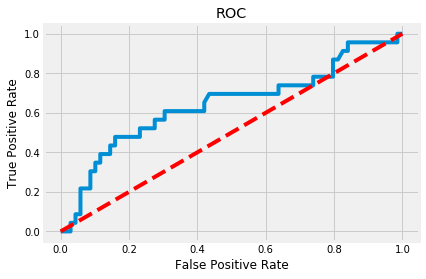

In [65]:
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [66]:
roc_auc_score(y_test, lr.predict(X_test))

0.5